# Load the libraries

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from Modules.SupervisedLearning import LinearRegression

<IPython.core.display.Javascript object>


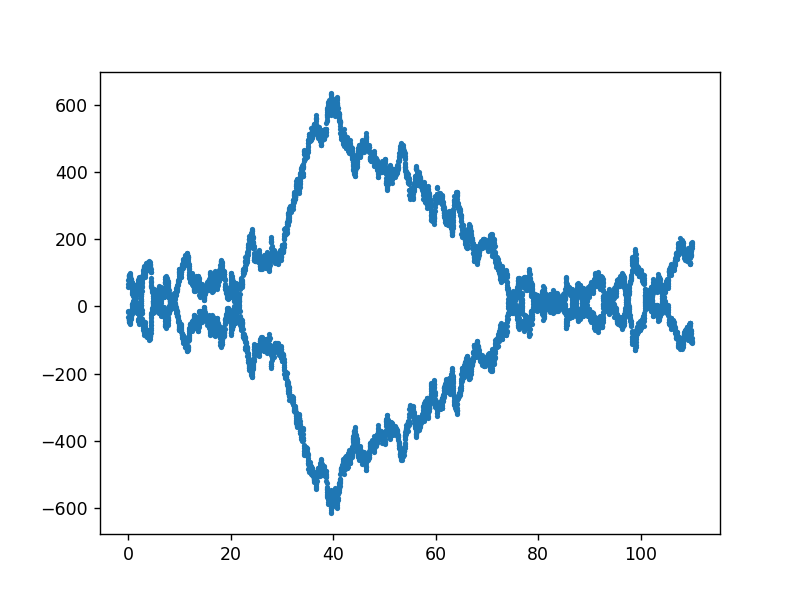

In [46]:
from scipy.signal import butter, lfilter
from scipy.signal import freqs

def butter_lowpass(cutOff, fs, order=5):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='lowpass', analog = True)
    return b, a

def butter_lowpass_filter(data, cutOff, fs, order=4):
    b, a = butter_lowpass(cutOff, fs, order=order)
    y = lfilter(b, a, data)
    return y

cutOff = 1 #cutoff frequency in rad/s
fs = 2 #sampling frequency in rad/s
order = 1 #order of filter

#print sticker_data.ps1_dxdt2

y = butter_lowpass_filter(y_train, cutOff, fs, order)
plt.figure()
plt.scatter(x_train, y, marker = ".", linewidth = 0.00001)

# Load River dataset

<IPython.core.display.Javascript object>


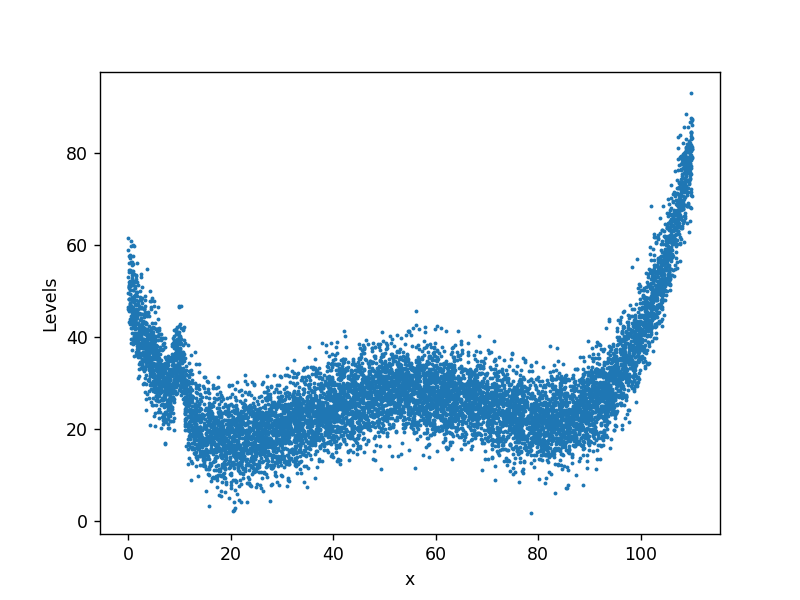

In [7]:
dataset = pd.read_csv("data/Assignment2Data_4.csv")
# dataset = pd.read_csv("data/Assignment2_river_data.csv")
dataset = dataset.sort_values(by = "x")
dataset.plot.scatter(x = "x", y = "Levels", marker = ".", linewidth = 0.00001)

x_train = dataset["x"].values.reshape(dataset.shape[0], 1)
y_train = dataset["Levels"].values

# Linear regression

In [4]:
predictor = LinearRegression()
x_train_ = np.concatenate([x_train, x_train ** 2, x_train ** 3, x_train ** 4], axis = 1)
predictions = predictor.Fit(x_train_, y_train)

<IPython.core.display.Javascript object>


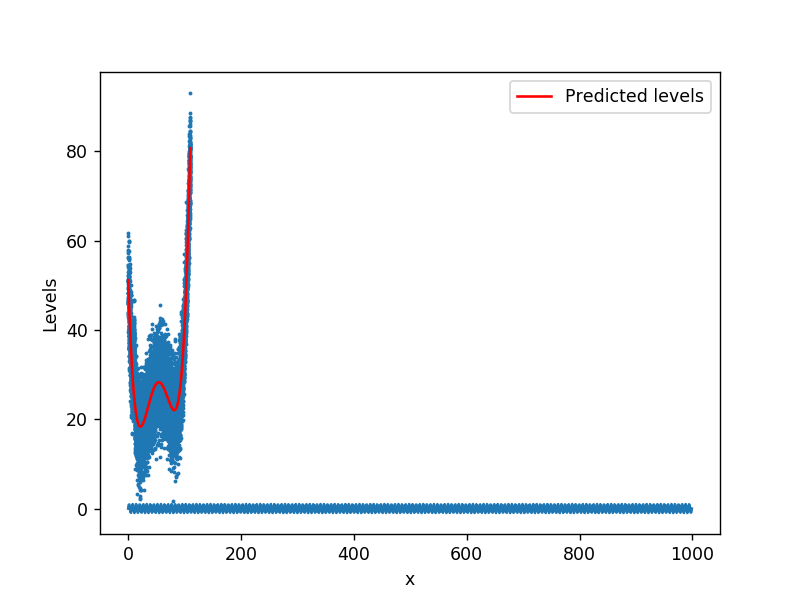

In [5]:
ax = dataset.plot.scatter(x = "x", y = "Levels", marker = ".", linewidth = 0.00001)
ax.plot(x_train, predictions, color = "r", label = "Predicted levels")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)